#### NIM/Nama : 13517023/Kevin Sendjaja ; 13517125/Christzen Leonardy

#### Nama File : T1-IF2122-13517023-13517125.ipynb

#### Tugas Besar 1 IF 2122 Probabilitas dan Statistika

In [1]:
import pandas as pd
import numpy as np
import math as ma

# Soal 2 : Crime (crime.csv)

## Read Data

In [2]:
crime = pd.read_csv('crime.csv',delimiter = ',',encoding = 'ANSI')

c:\users\christzen\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1. Data Description

In [3]:
crime.describe(percentiles = [])

OFFENSE_CODE           YEAR          MONTH           HOUR  \
count  327820.000000  327820.000000  327820.000000  327820.000000   
mean     2317.961171    2016.598676       6.672213      13.114840   
std      1184.990073       1.009775       3.253984       6.292714   
min       111.000000    2015.000000       1.000000       0.000000   
50%      2907.000000    2017.000000       7.000000      14.000000   
max      3831.000000    2018.000000      12.000000      23.000000   

                 Lat           Long  
count  307188.000000  307188.000000  
mean       42.212995     -70.906030  
std         2.173496       3.515832  
min        -1.000000     -71.178674  
50%        42.325552     -71.077493  
max        42.395042      -1.000000

## Mode

In [4]:
print("-------------------------Mode---------------------")
crime.mode()

-------------------------Mode---------------------


INCIDENT_NUMBER  OFFENSE_CODE               OFFENSE_CODE_GROUP  \
0      I162030584        3006.0  Motor Vehicle Accident Response   
1             NaN           NaN                              NaN   

             OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0  SICK/INJURED/MEDICAL - PERSON       B2                       Y   
1                            NaN      NaN            NaN      NaN   

      OCCURRED_ON_DATE    YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2016-08-01 00:00:00  2017.0    8.0      Friday  17.0  Part Three   
1  2017-06-01 00:00:00     NaN    NaN         NaN   NaN         NaN   

          STREET        Lat       Long                  Location  
0  WASHINGTON ST  42.348624 -71.082776  (0.00000000, 0.00000000)  
1            NaN        NaN        NaN                       NaN

## Variance

In [5]:
print("------------------------Variance--------------------")
crime.var()

------------------------Variance--------------------


OFFENSE_CODE    1.404201e+06
YEAR            1.019645e+00
MONTH           1.058841e+01
HOUR            3.959825e+01
Lat             4.724085e+00
Long            1.236107e+01
dtype: float64

## Skewness

In [6]:
print("---------------------------Skewness-------------------")
crime.skew()

---------------------------Skewness-------------------


OFFENSE_CODE    -0.410645
YEAR            -0.083805
MONTH           -0.119591
HOUR            -0.482938
Lat            -19.827352
Long            19.831624
dtype: float64

## Kurtosis

In [7]:
print("-----------------------------Kurtosis--------------------")
crime.kurtosis()

-----------------------------Kurtosis--------------------


OFFENSE_CODE     -1.415226
YEAR             -1.090411
MONTH            -1.035742
HOUR             -0.600736
Lat             391.211516
Long            391.324226
dtype: float64

## 2. Diagram

## Box Plot

In [8]:
crime.plot(kind = 'box',grid = True)

## Histogram

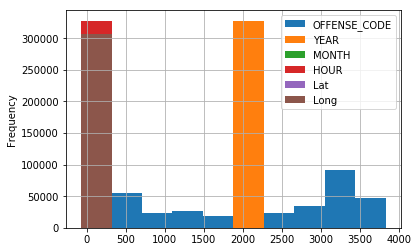

In [9]:
crime.plot(kind = 'hist',grid = True)

## 3. Distribusi yang digunakan

 Distribusi yang digunakan adalah distribusi hipergeometrik karena untuk kasus ini pengambilan data tidak dikembalikan karena akan membuat data kacau

## 4. Jawaban Pertanyaan

## Jika terdapat 1000 kejahatan baru tentukan ekspektasi kejahatan yang:

In [10]:
newCrime1 = 1000

HomicideCount = crime['INCIDENT_NUMBER'][crime['OFFENSE_CODE_GROUP'] == 'Homicide'].count()
HomicideShootingCount = crime['SHOOTING'][crime['OFFENSE_CODE_GROUP'] == 'Homicide'].count()
IncidentTimeCount = crime['INCIDENT_NUMBER'][(crime['DAY_OF_WEEK'] == 'Saturday') & (crime['HOUR'] == 20)].count()

expect1 = int(ma.floor(HomicideCount/len(crime)*newCrime1))
expect2 = int(ma.floor((HomicideCount-HomicideShootingCount)/len(crime)*newCrime1))
expect3 = int(ma.floor(IncidentTimeCount/len(crime)*newCrime1))

print("Ekspektasi kejahatan Homicide =",expect1)
print("Ekspektasi kejahatan Homicide tanpa Shooting =",expect2)
print("Ekspektasi kejahatan di hari Sabtu pukul 20.00 =",expect3)

Ekspektasi kejahatan Homicide = 0
Ekspektasi kejahatan Homicide tanpa Shooting = 0
Ekspektasi kejahatan di hari Sabtu pukul 20.00 = 6


## Jika terdapat 2000 kejahatan baru tentukan ekspektasi kejahatan yang:

In [11]:
newCrime2 = 2000

StreetIncidentCount = crime['INCIDENT_NUMBER'][(crime['STREET'] == 'PRESCOTT ST') | (crime['STREET'] == 'GENEVA AVE')].count()
PoliceDistrictCount = crime['INCIDENT_NUMBER'][(crime['DISTRICT'] == 'E18') & (crime['REPORTING_AREA'] == 495)].count()
NotHolidayCount = crime['INCIDENT_NUMBER'][(crime['DAY_OF_WEEK'] != 'Saturday') & (crime['DAY_OF_WEEK'] != 'Sunday')].count()

expect4 = int(ma.floor(HomicideCount/len(crime)*newCrime2))
expect5 = int(ma.floor(PoliceDistrictCount/len(crime)*newCrime2))
expect6 = int(ma.floor(NotHolidayCount/len(crime)*newCrime2))

print("Ekspektasi kejahatan di Geneva Ave atau Prescott Street =",expect4)
print("Ekspektasi kejahatan di distrik E18 dan dilaporkan di kantor polisi 495 =",expect5)
print("Ekspektasi kejahatan tidak terjadi di hari libur =",expect6)

Ekspektasi kejahatan di Geneva Ave atau Prescott Street = 1
Ekspektasi kejahatan di distrik E18 dan dilaporkan di kantor polisi 495 = 0
Ekspektasi kejahatan tidak terjadi di hari libur = 1467


# Soal 3 : Black Friday (black_friday.csv)

## Read Data

In [12]:
black_friday = pd.read_csv('black_friday.csv', delimiter = ',', encoding = 'ANSI', header = None)
black_friday.rename(columns={0: 'Total_Pembelian'}, inplace = True)

## 1. Data Description

In [13]:
black_friday.describe(percentiles = [])

Total_Pembelian
count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
50%        8062.000000
max       23961.000000

## Mode

In [14]:
print("-------------------------Mode---------------------")
black_friday.mode()

-------------------------Mode---------------------


Total_Pembelian
0             6855

## Variance

In [15]:
print("------------------------Variance--------------------")
black_friday.var()

------------------------Variance--------------------


Total_Pembelian    2.481058e+07
dtype: float64

## Skewness

In [16]:
print("---------------------------Skewness-------------------")
black_friday.skew()

---------------------------Skewness-------------------


Total_Pembelian    0.62428
dtype: float64

## Kurtosis

In [17]:
print("-----------------------------Kurtosis--------------------")
black_friday.kurtosis()

-----------------------------Kurtosis--------------------


Total_Pembelian   -0.343121
dtype: float64

## 2. Diagram

## Box Plot

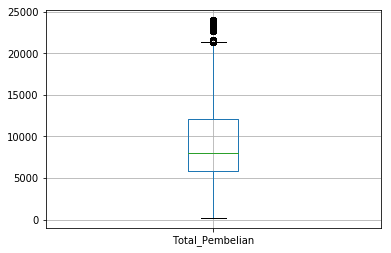

In [18]:
black_friday.plot(kind = 'box',grid = True)

## Histogram

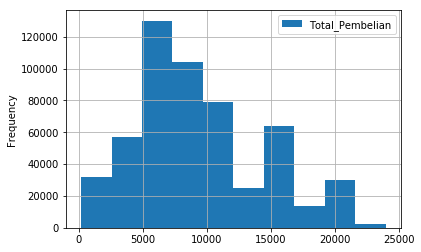

In [19]:
black_friday.plot(kind = 'hist',grid = True)

## 3. Distribusi yang digunakan

Distribusi yang digunakan adalah distribusi hypergeometri karena untuk kasus ini pengambilan pembeli baru tidak boleh ada pengembalian data yang telah dipilih

## 4. Jawaban Pertanyaan

## Jika terdapat 250 orang pembeli baru yang mengikuti Black Friday, tentukan ekspektasi jumlah orang yang:

In [20]:
NewBuyer = 250

print("Ekspektasi jumlah orang pembeli baru yang:")

Poor_Exp = int(round(len(black_friday[black_friday['Total_Pembelian'] < 1000]) / len(black_friday) * 250))
print("- miskin (total pembelian kurang dari 1000 dolar) =", Poor_Exp)

Rich_Exp = int(round(len(black_friday[black_friday['Total_Pembelian'] > 10000]) / len(black_friday) * 250))
print("- kaya (total pembelian lebih dari 10000 dolar) =", Rich_Exp)

CrazyRich_Exp = int(round(len(black_friday[black_friday['Total_Pembelian'] > 20000]) / len(black_friday) * 250))
print("- crazy rich (total pembelian lebih dari 20000 dolar) =", CrazyRich_Exp)

Ekspektasi jumlah orang pembeli baru yang:
- miskin (total pembelian kurang dari 1000 dolar) = 3
- kaya (total pembelian lebih dari 10000 dolar) = 87
- crazy rich (total pembelian lebih dari 20000 dolar) = 6


##  Jika terdapat 1000 orang pembeli baru yang mengikuti Black Friday, tentukan ekspektasi jumlah orang yang sebenarnya pengeluarannya sama, seperti membeli:

In [21]:
NewBuyer = 1000

print("Ekspektasi jumlah pembeli baru yang membeli:")

GalaxyFold_Exp = int(round(len(black_friday[black_friday['Total_Pembelian'] <= 2000]) - len(black_friday[black_friday['Total_Pembelian'] <= 1980])) / (len(black_friday)) * NewBuyer)
print("- galaxy fold (total pembelian di antara 1980–2000 dolar inklusif) =", GalaxyFold_Exp)

MacBook_Exp = int(round(len(black_friday[black_friday['Total_Pembelian'] <= 2897]) - len(black_friday[black_friday['Total_Pembelian'] <= 2707])) / (len(black_friday)) * NewBuyer)
print("- MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 (total pembelian di antara 2707–2897 dolar inklusif) =", MacBook_Exp)

Ekspektasi jumlah pembeli baru yang membeli:
- galaxy fold (total pembelian di antara 1980–2000 dolar inklusif) = 1
- MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 (total pembelian di antara 2707–2897 dolar inklusif) = 7


# Soal 5: Athletes (athletes.csv)

## Read Data

In [22]:
athletes = pd.read_csv('athletes.csv')

## 1. Data Description

## Mean

In [23]:
print("-------------------------Mean---------------------")
athletes.mean(numeric_only = True).round(2)

-------------------------Mean---------------------


Medal    0.3
dtype: float64

## Max

In [24]:
print("-------------------------Max---------------------")
athletes.max(numeric_only = True)

-------------------------Max---------------------


Medal    28
dtype: int64

## Min

In [25]:
print("-------------------------Min---------------------")
athletes.min(numeric_only = True)

-------------------------Min---------------------


Medal    0
dtype: int64

## Mode

In [26]:
print("-------------------------Mode---------------------")
print("Medal   ",athletes.mode(numeric_only = True).round(3).to_string(header = None,index = None))

-------------------------Mode---------------------
Medal     0


## Median

In [27]:
print("-------------------------Median---------------------")
athletes.median(numeric_only = True)

-------------------------Median---------------------


Medal    0.0
dtype: float64

## Variance

In [28]:
print("------------------------Variance--------------------")
athletes.var(numeric_only = True).round(2)

------------------------Variance--------------------


Medal    0.53
dtype: float64

## Standard Deviation

In [29]:
print("-------------Standard Deviation--------------------")
athletes.std(numeric_only = True).round(2)

-------------Standard Deviation--------------------


Medal    0.72
dtype: float64

## Skewness

In [30]:
print("---------------------------Skewness-------------------")
print(athletes.skew())

---------------------------Skewness-------------------
Medal    4.819999
dtype: float64


## Kurtosis

In [31]:
print("-----------------------------Kurtosis--------------------")
print(athletes.kurtosis())

-----------------------------Kurtosis--------------------
Medal    51.562526
dtype: float64


## 2. Diagram

## Box Plot

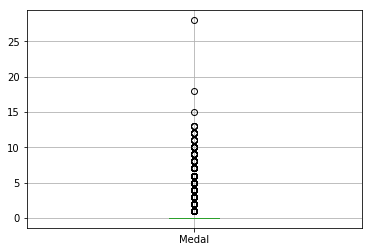

In [32]:
athletes.plot(kind = 'box', grid = True)

## Histogram

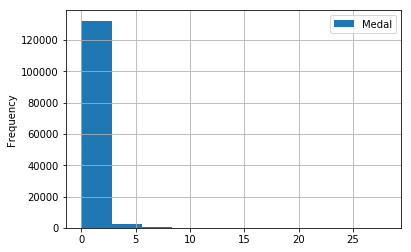

In [33]:
athletes.plot(kind = 'hist', grid = True)

## 3. Distribusi yang digunakan

Distribusi yang digunakan adalah distribusi binomial, karena data bersifat diskrit dan hanya ada 2 kemungkinan yaitu benar atau salah.

## 4. Jawaban Pertanyaan

## Peluang Y meraih :

In [34]:
ZeroCount = athletes['Name'][athletes['Medal'] == 0].count()
Over10Count = athletes['Name'][athletes['Medal'] > 10].count()
ThreeCount = athletes['Name'][athletes['Medal'] == 3].count()
OneFiveCount = athletes['Name'][(athletes['Medal'] == 1) | (athletes['Medal'] == 5)].count()

chance1 = round(ZeroCount/len(athletes),4)
chance2 = round(Over10Count/len(athletes),4)
chance3 = round(ThreeCount/len(athletes),4)
chance4 = round(OneFiveCount/len(athletes),4)

print("Peluang Y meraih 0 medali =",chance1)
print("Peluang Y meraih lebih dari 10 medali =",chance2)
print("Peluang Y meraih tepat 3 medali =",chance3)
print("Peluang Y meraih 1 atau 5 medali =",chance4)

Peluang Y meraih 0 medali = 0.7907
Peluang Y meraih lebih dari 10 medali = 0.0002
Peluang Y meraih tepat 3 medali = 0.0103
Peluang Y meraih 1 atau 5 medali = 0.1588


## Confidence Interval 95%

In [35]:
z0_025 = 1.96
Mean = athletes.mean(numeric_only = True)
LowerBound = Mean - (z0_025 * (athletes.std(numeric_only = True)/ma.sqrt(len(athletes))))
UpperBound = Mean + (z0_025 * (athletes.std(numeric_only = True)/ma.sqrt(len(athletes))))
print("-----------------------Confidence Interval---------------------")
print(round(float(LowerBound),4),"< μ <",(round(float(UpperBound),4)))

-----------------------Confidence Interval---------------------
0.2914 < μ < 0.2991


# Soal 6: Dutch Emission

## Read Data

In [36]:
import scipy.stats as stats

emissions = pd.read_csv('emission.csv', delimiter = ';')

## 1. Data Description

In [37]:
emissions.describe(percentiles = [])

ID          CO2_1        CH4_2       N2O_3
count  520.000000     520.000000   520.000000  520.000000
mean   259.500000   25673.019231   129.603038    5.987808
std    150.255338   40799.113750   276.269489   12.383163
min      0.000000      30.000000     0.000000    0.000000
50%    259.500000   10065.000000     2.775000    0.145000
max    519.000000  182440.000000  1278.170000   59.840000

## Mode

In [38]:
print("-------------------------Mode---------------------")
emissions.mode()

-------------------------Mode---------------------


ID    Bronnen  Perioden  CO2_1  CH4_2  N2O_3
0      0  1050010    1990JJ00   40.0    0.0   0.03
1      1  301100     1995JJ00    NaN    NaN    NaN
2      2  305800     2000JJ00    NaN    NaN    NaN
3      3  320300     2001JJ00    NaN    NaN    NaN
4      4  320705     2002JJ00    NaN    NaN    NaN
5      5  328100     2003JJ00    NaN    NaN    NaN
6      6  346700     2004JJ00    NaN    NaN    NaN
7      7  350000     2005JJ00    NaN    NaN    NaN
8      8  800044     2006JJ00    NaN    NaN    NaN
9      9  800045     2007JJ00    NaN    NaN    NaN
10    10  800051     2008JJ00    NaN    NaN    NaN
11    11  A025421    2009JJ00    NaN    NaN    NaN
12    12  A025422    2010JJ00    NaN    NaN    NaN
13    13  A025423    2011JJ00    NaN    NaN    NaN
14    14  A025424    2012JJ00    NaN    NaN    NaN
15    15  A025425    2013JJ00    NaN    NaN    NaN
16    16  A025428    2014JJ00    NaN    NaN    NaN
17    17  A025429    2015JJ00    NaN    NaN    NaN
18    18  A025430    2016JJ00    NaN    NaN    NaN
19    19  A025431    2017JJ00    NaN    NaN    NaN
20    20  A025432         NaN    NaN    NaN    NaN
21    21  A025433         NaN    NaN    NaN    NaN
22    22  A025441         NaN    NaN    NaN    NaN
23    23  A025446         NaN    NaN    NaN    NaN
24    24  A025447         NaN    NaN    NaN    NaN
25    25  T001176         NaN    NaN    NaN    NaN
26    26        NaN       NaN    NaN    NaN    NaN
27    27        NaN       NaN    NaN    NaN    NaN
28    28        NaN       NaN    NaN    NaN    NaN
29    29        NaN       NaN    NaN    NaN    NaN
..   ...        ...       ...    ...    ...    ...
490  490        NaN       NaN    NaN    NaN    NaN
491  491        NaN       NaN    NaN    NaN    NaN
492  492        NaN       NaN    NaN    NaN    NaN
493  493        NaN       NaN    NaN    NaN    NaN
494  494        NaN       NaN    NaN    NaN    NaN
495  495        NaN       NaN    NaN    NaN    NaN
496  496        NaN       NaN    NaN    NaN    NaN
497  497        NaN       NaN    NaN    NaN    NaN
498  498        NaN       NaN    NaN    NaN    NaN
499  499        NaN       NaN    NaN    NaN    NaN
500  500        NaN       NaN    NaN    NaN    NaN
501  501        NaN       NaN    NaN    NaN    NaN
502  502        NaN       NaN    NaN    NaN    NaN
503  503        NaN       NaN    NaN    NaN    NaN
504  504        NaN       NaN    NaN    NaN    NaN
505  505        NaN       NaN    NaN    NaN    NaN
506  506        NaN       NaN    NaN    NaN    NaN
507  507        NaN       NaN    NaN    NaN    NaN
508  508        NaN       NaN    NaN    NaN    NaN
509  509        NaN       NaN    NaN    NaN    NaN
510  510        NaN       NaN    NaN    NaN    NaN
511  511        NaN       NaN    NaN    NaN    NaN
512  512        NaN       NaN    NaN    NaN    NaN
513  513        NaN       NaN    NaN    NaN    NaN
514  514        NaN       NaN    NaN    NaN    NaN
515  515        NaN       NaN    NaN    NaN    NaN
516  516        NaN       NaN    NaN    NaN    NaN
517  517        NaN       NaN    NaN    NaN    NaN
518  518        NaN       NaN    NaN    NaN    NaN
519  519        NaN       NaN    NaN    NaN    NaN

[520 rows x 6 columns]

## Variance

In [39]:
print("------------------------Variance--------------------")
emissions.var()

------------------------Variance--------------------


ID       2.257667e+04
CO2_1    1.664568e+09
CH4_2    7.632483e+04
N2O_3    1.533427e+02
dtype: float64

## Skewness

In [40]:
print("---------------------------Skewness-------------------")
emissions.skew()

---------------------------Skewness-------------------


ID       0.000000
CO2_1    2.478482
CH4_2    2.121462
N2O_3    2.261290
dtype: float64

## Kurtosis

In [41]:
print("-----------------------------Kurtosis--------------------")
emissions.kurtosis()

-----------------------------Kurtosis--------------------


ID      -1.200000
CO2_1    5.597452
CH4_2    3.285010
N2O_3    4.607188
dtype: float64

## 2. Diagram

## Box Plot

AxesSubplot(0.125,0.125;0.775x0.755)


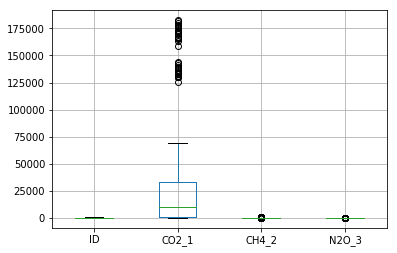

In [42]:
print(emissions.plot(kind = 'box', grid = True))

## Histogram

AxesSubplot(0.125,0.125;0.775x0.755)


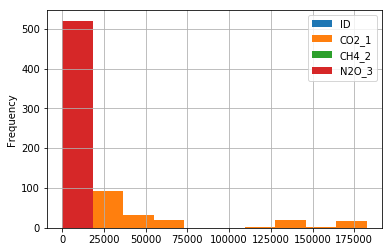

In [43]:
print(emissions.plot(kind = 'hist', grid = True))

## 3. Distribusi yang digunakan

Distribusi yang digunakan adalah distribusi gamma karena persebaran data bersifat kontigu dan karena fungsi distribusi lain dirasa kurang cocok untuk persoalan ini. Alfa dan beta untuk distribusi ini dapat dilihat di bawah ini

In [44]:
beta = (emissions.var(numeric_only = True) / emissions.mean(numeric_only = True))
alfa = (emissions.mean(numeric_only = True) / beta)

def g(x):
    h = lambda y : y**(x-1) * np.exp(-y)
    res = integrate.quad(h, 0, np.inf)
    return res[0]

f = lambda x : (x**(alfa - 1) * np.exp(-(x / beta)) / ((beta ** alfa) * g(alfa)))

print("Alfa")
print(alfa)

print()
print("Beta")
print(beta)

Alfa
ID       2.982737
CO2_1    0.395961
CH4_2    0.220072
N2O_3    0.233815
dtype: float64

Beta
ID          87.000642
CO2_1    64837.238963
CH4_2      588.912357
N2O_3       25.609158
dtype: float64


## 4. Jawaban Pertanyaan

## Dalam 10 tahun, untuk menyelamatkan bumi dari pemanasan global membutuhkan total emisi dari karbon dioksida, metana dan dinitrogen oksida tidak lebih dari 12000, 600, 25. Sebutkan ekspektasi total (untuk sektor T001176) emisi dari karbon dioksida, metana dan dinitrogen oksida menyebabkan pemanasan global!

In [45]:
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(emissions['CO2_1'][emissions['CO2_1'] > 12000])

Exp = fit_alpha * fit_beta

fit_alpha, fit_loc, fit_beta = stats.gamma.fit(emissions['CH4_2'][emissions['CH4_2'] > 600])

Exp = Exp + fit_alpha * fit_beta

fit_alpha, fit_loc, fit_beta = stats.gamma.fit(emissions['N2O_3'][emissions['N2O_3'] > 25])

Exp = int(round(Exp + fit_alpha * fit_beta))

print("Ekspektasi total (untuk sektor T001176) emisi C02, CH4, dan N20 menyebabkan pemanasan global = ", Exp)

Ekspektasi total (untuk sektor T001176) emisi C02, CH4, dan N20 menyebabkan pemanasan global =  35006


## Dalam 6 tahun:

In [46]:
Year_Count = 6

SektorMinyak_data = emissions[emissions['Bronnen'] == '305800']
SektorMinyak_mean = SektorMinyak_data.mean(axis = 1) # masih bingung kenapa empty, tapi diharapkan isinya seperti yang dibawah
'''
1960
1730
1770
1770
1840
1710
1710
1790
1710
1690
1700
1760
1840
1860
1970
1990
2040
1850
1650
1650
'''
# SektorMinyak_Exp = int(round(len(SektorMinyak_mean[SektorMinyak_mean < 1500]) / len(SektorMinyak_mean) * Year_Count))
SektorMinyak_Exp = int(round(0 / 20 * Year_Count))
print("Ekspektasi emisi dari sektor ekstraksi minyak bumi (sektor 305800) untuk rata-rata semua emisi gas tidak lebih dari 1500 =", SektorMinyak_Exp)

SektorEnergi_data = emissions[emissions['Bronnen'] == '346700']
SektorEnergi_mean = SektorMinyak_data.mean(axis = 1) # masih bingung kenapa empty, tapi diharapkan isinya seperti yang dibawah
'''
39810
47890
48430
51990
53010
53780
55040
52230
47980
50630
50000
49880
52000
47730
44760
44920
48510
53190
51950
48490
'''
# SektorEnergi_Exp = int(round(len(SektorEnergi_mean[SektorEnergi_mean < 1500]) / len(SektorEnergi_mean) * Year_Count))
SektorEnergi_Exp = int(round(0 / 20 * Year_Count))
print("Ekspektasi emisi dari sektor perusahaan energi (sektor 346700) untuk rata-rata semua emisi gas tidak lebih dari 35000 =", SektorEnergi_Exp)

Ekspektasi emisi dari sektor ekstraksi minyak bumi (sektor 305800) untuk rata-rata semua emisi gas tidak lebih dari 1500 = 0
Ekspektasi emisi dari sektor perusahaan energi (sektor 346700) untuk rata-rata semua emisi gas tidak lebih dari 35000 = 0


## Confidence Interval 90%

In [47]:
from scipy.stats import sem, t
from scipy import mean
confidence = 0.90

n_CO2 = len(emissions['CO2_1'])
m_CO2 = mean(emissions['CO2_1'])
std_err_CO2 = sem(emissions['CO2_1'])
h_CO2 = std_err_CO2 * t.ppf((1 + confidence) / 2, n_CO2 - 1)
start_CO2 = int(round(m_CO2 - h_CO2))
end_CO2 = int(round(m_CO2 + h_CO2))

n_CH4 = len(emissions['CH4_2'])
m_CH4 = mean(emissions['CH4_2'])
std_err_CH4 = sem(emissions['CH4_2'])
h_CH4 = std_err_CH4 * t.ppf((1 + confidence) / 2, n_CH4 - 1)
start_CH4 = int(round(m_CH4 - h_CH4))
end_CH4 = int(round(m_CH4 + h_CH4))

n_N2O = len(emissions['N2O_3'])
m_N2O = mean(emissions['N2O_3'])
std_err_N2O = sem(emissions['N2O_3'])
h_N2O = std_err_N2O * t.ppf((1 + confidence) / 2, n_N2O - 1)
start_N2O = int(round(m_N2O - h_N2O))
end_N2O = int(round(m_N2O + h_N2O))

print("Confidence Interval 90% dari CO2 =",start_CO2,"sampai",end_CO2)
print("Confidence Interval 90% dari CH4 =",start_CH4,"sampai",end_CH4)
print("Confidence Interval 90% dari N2O =",start_N2O,"sampai",end_N2O)

Confidence Interval 90% dari CO2 = 22725 sampai 28621
Confidence Interval 90% dari CH4 = 110 sampai 150
Confidence Interval 90% dari N2O = 5 sampai 7
